In [ ]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal

# Обучение модели CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загружаем тренировочные данные.

In [ ]:
data2 = np.load('/content/drive/MyDrive/data2.npy')
result2 = np.load('/content/drive/MyDrive/results2.npy')

data5 = np.load('/content/drive/MyDrive/data5.npy')
result5 = np.load('/content/drive/MyDrive/results5.npy')

In [ ]:
train_data = np.vstack([data2[0:9000],data5[0:9000]])
train_results = np.vstack([result2[0:9000], result5[0:9000]])

Модель СNN

In [ ]:
def CNN():
    inputs = tf.keras.Input(shape=(129, 20, 12))
    x = tf.keras.layers.Conv2D(64, kernel_size=5, padding='same',activation = 'relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(96, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(160, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(6, activation='sigmoid')(x)

    return tf.keras.Model(inputs, outputs)

In [ ]:
model = CNN()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 129, 20, 12)]     0         
                                                                 
 conv2d (Conv2D)             (None, 129, 20, 64)       19264     
                                                                 
 batch_normalization (Batch  (None, 129, 20, 64)       256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 10, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 10, 96)        153696    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 10, 96)        384   

Компилируем и обучаем модель

In [ ]:
model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

history = model.fit(train_data, train_results,
    epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
450/450 [==============================] - 546s 1s/step - loss: 0.0867 - accuracy: 0.2850 - val_loss: 0.1830 - val_accuracy: 0.0247
Epoch 2/20
450/450 [==============================] - 537s 1s/step - loss: 0.0693 - accuracy: 0.4060 - val_loss: 0.1021 - val_accuracy: 0.0392
Epoch 3/20
450/450 [==============================] - 540s 1s/step - loss: 0.0662 - accuracy: 0.4598 - val_loss: 0.1442 - val_accuracy: 0.4453
Epoch 4/20
450/450 [==============================] - 537s 1s/step - loss: 0.0618 - accuracy: 0.5440 - val_loss: 0.3029 - val_accuracy: 0.3736
Epoch 5/20
450/450 [==============================] - 533s 1s/step - loss: 0.0607 - accuracy: 0.5722 - val_loss: 0.0828 - val_accuracy: 0.6128
Epoch 6/20
450/450 [==============================] - 532s 1s/step - loss: 0.0585 - accuracy: 0.6093 - val_loss: 0.0756 - val_accuracy: 0.8006
Epoch 7/20
450/450 [==============================] - 521s 1s/step - loss: 0.0566 - accuracy: 0.6732 - val_loss: 0.0820 - val_accuracy: 0.1514

Сохраняем веса модели.



In [ ]:
model.save( 'model_weights.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0, 0.5, 'Accuracy')

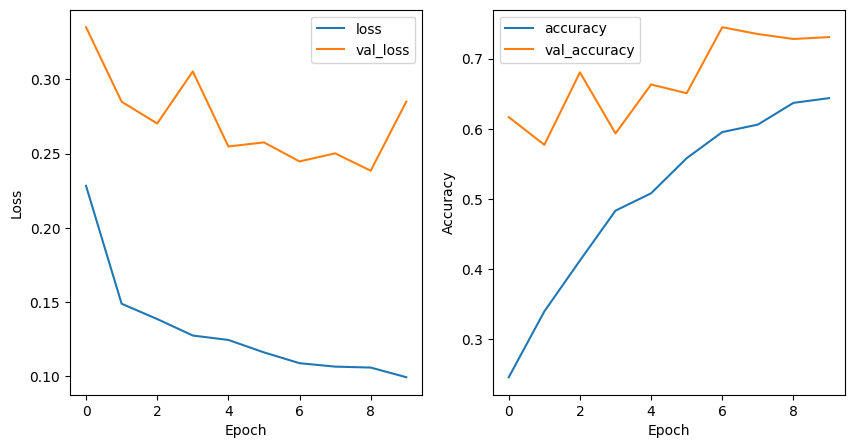

In [ ]:
metrics = history.history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Загружаем тестовые данные.

In [ ]:
test_data = np.load('/content/drive/MyDrive/data.npy')
test_result = np.load('/content/drive/MyDrive/results.npy')

Предсказываем вероятность обнаружения болезней по тестовым данным.

In [ ]:
res = model.predict(test_data)

16/16 [==============================] - 7s 398ms/step


In [ ]:
print(np.round(res[58:70]*100, decimals=1))

[[11.9  0.1  1.3  4.6  0.   1.6]
 [ 1.7  0.4  0.   0.2  0.   0.1]
 [ 5.3 10.6  0.2  0.4  0.   4.6]
 [ 2.8  1.5  0.9  0.   7.5 37.3]
 [ 0.1  0.   0.   0.   0.   0. ]
 [13.1  3.8  0.2  1.5  0.1  2.7]
 [ 1.6  0.2  0.   0.1  0.   0.3]
 [ 7.5  0.   0.   7.6  0.   0.1]
 [ 2.9  0.   0.   0.   0.   0.1]
 [ 1.3 99.2  0.   0.   0.   0.4]
 [ 4.6  0.3  0.1  0.   0.1  2.7]
 [ 4.5  0.   0.   0.   0.   0.1]]


In [ ]:
print(test_result[58:70])

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Загружаем новую выборку с тренировочными данными.

In [ ]:
data1 = np.load('/content/drive/MyDrive/data1.npy')
result1 = np.load('/content/drive/MyDrive/results1.npy')

data0 = np.load('/content/drive/MyDrive/data0.npy')
result0 = np.load('/content/drive/MyDrive/results0.npy')

In [ ]:
train_data_1 = np.vstack([data0[0:9000],data1[0:9000]])
train_results_1 = np.vstack([result0[0:9000], result1[0:9000]])

Загружаем веса обученной модели.

In [ ]:
model.load_weights('/content/drive/MyDrive/model_weights.h5')

Компилируем и дообучаем модель на новых данных.

In [ ]:
model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

new_history = model.fit(train_data_1, train_results_1,
    epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
450/450 [==============================] - 482s 1s/step - loss: 0.0517 - accuracy: 0.7415 - val_loss: 0.0498 - val_accuracy: 0.5353
Epoch 2/20
450/450 [==============================] - 496s 1s/step - loss: 0.0476 - accuracy: 0.7481 - val_loss: 0.0658 - val_accuracy: 0.7303
Epoch 3/20
450/450 [==============================] - 509s 1s/step - loss: 0.0458 - accuracy: 0.7631 - val_loss: 0.0910 - val_accuracy: 0.5608
Epoch 4/20
450/450 [==============================] - 505s 1s/step - loss: 0.0447 - accuracy: 0.7763 - val_loss: 0.0587 - val_accuracy: 0.7844
Epoch 5/20
450/450 [==============================] - 514s 1s/step - loss: 0.0425 - accuracy: 0.7553 - val_loss: 0.0625 - val_accuracy: 0.8244
Epoch 6/20
450/450 [==============================] - 502s 1s/step - loss: 0.0407 - accuracy: 0.7978 - val_loss: 0.0495 - val_accuracy: 0.6539
Epoch 7/20
450/450 [==============================] - 521s 1s/step - loss: 0.0394 - accuracy: 0.8119 - val_loss: 0.0537 - val_accuracy: 0.7772

Сохраняем веса модели.

In [ ]:
model.save( 'new_model_weights.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
